         Date          A         AA      AAPL  ABBV        ABC       ABT  \
0  2003-07-31  13.790836  53.019848  1.019303   NaN  12.739487  9.022574   
1  2003-08-01  13.676599  51.759747  1.002379   NaN  12.579965  8.859362   
2  2003-08-04  13.682946  52.256149  1.025589   NaN  12.398233  8.850165   
3  2003-08-05  13.219654  51.206055  0.985455   NaN  12.111500  8.700747   
4  2003-08-06  13.060995  50.783653  0.949190   NaN  11.752071  8.873152   

         ACN       ADBE        ADI  ...       XEL         XL       XLNX  \
0  15.108545  16.333433  26.962475  ...  7.946304  53.450195  19.403030   
1  15.816516  16.268559  28.070812  ...  7.858501  50.491951  19.898077   
2  15.660917  16.523066  28.227112  ...  7.803621  51.500431  19.838972   
3  15.147444  16.183720  27.132978  ...  7.699356  51.856777  19.225708   
4  14.937387  15.749559  27.175615  ...  7.748745  52.643398  19.151808   

         XOM       XRAY        XRX  XYL       YUM       ZION  ZNGA  
0  24.283438  20.140688

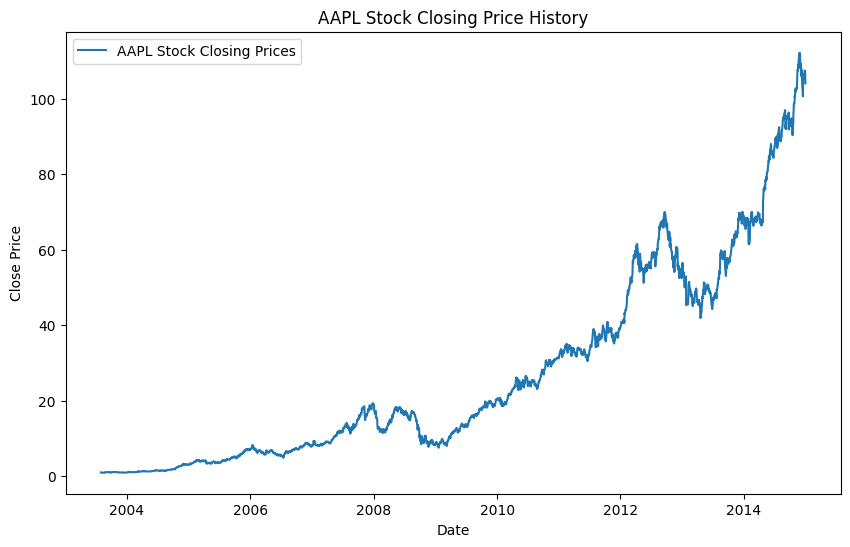

Epoch 1/20


c:\Users\Rahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0039 - val_loss: 7.0987e-04
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 8.5353e-05 - val_loss: 7.3119e-04
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 8.9945e-05 - val_loss: 7.7113e-04
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 7.6805e-05 - val_loss: 7.0262e-04
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 8.3477e-05 - val_loss: 6.1779e-04
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 7.6850e-05 - val_loss: 6.1936e-04
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 7.7077e-05 - val_loss: 5.8722e-04
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 7.4536e-05 - val_loss: 5.7598e-04
Epoch 9/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 8.8549e-05 - val_loss: 6.9873e-04
Epoch 10/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 7.7554e-05 - val_loss: 4.8118e-04
Epoch 11/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 6.7010e-05 - val_loss: 5

ValueError: could not broadcast input array from shape (2252,) into shape (2252,1)

In [3]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 2: Load Dataset and Select a Single Stock (e.g., AAPL)
# Replace 'path_to_file' with the path to your dataset file
data = pd.read_csv("stock_prices.csv")

# Check the first few rows of the data
print(data.head())

# Select the AAPL column and drop rows with missing values
data = data[["Date", "AAPL"]].dropna()

# Set Date as the index (optional, for better visualization)
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)

# Step 3: Visualize the Original Data
plt.figure(figsize=(10, 6))
plt.plot(data["AAPL"], label="AAPL Stock Closing Prices")
plt.title("AAPL Stock Closing Price History")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# Step 4: Data Preprocessing
# Scale the AAPL prices to the range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data["AAPL"].values.reshape(-1, 1))


# Define a function to create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i : i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)


# Set sequence length and create sequences
sequence_length = 60  # Typically use 60 days of data to predict the next day
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 5: Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Step 6: Train the Model
history = model.fit(
    X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test)
)

# Step 7: Make Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions and targets for interpretability
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

# Step 8: Plot Training and Testing Predictions
train_plot = np.empty_like(scaled_data)
train_plot[:] = np.nan
train_plot[sequence_length : len(train_predictions) + sequence_length] = (
    train_predictions.reshape(-1)
)

test_plot = np.empty_like(scaled_data)
test_plot[:] = np.nan
test_plot[len(train_predictions) + (sequence_length * 2) :] = test_predictions.reshape(
    -1
)

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_data), label="Original Data")
plt.plot(train_plot, label="Training Predictions")
plt.plot(test_plot, label="Testing Predictions")
plt.title("LSTM Model Predictions on AAPL Stock Prices")
plt.xlabel("Time Steps")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# Step 9: Evaluate the Model
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")